In [1]:
import pandas as pd
import pylab
import numpy as np

In [2]:
df = pd.read_csv('lab3.txt', names=['a', 'b', 'c', 'd', 'res'])
df.head(10)

,a,b,c,d,res
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor


In [4]:
dfx = df.drop('res', axis = 1)
dfy = df['res']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.25, random_state=42)

In [6]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr = lr.fit(x_train, y_train)

In [7]:
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [8]:
print(log_loss(y_test, lr.predict(x_test)))

0.40278922674782347


Auc:  0.9886279338324703


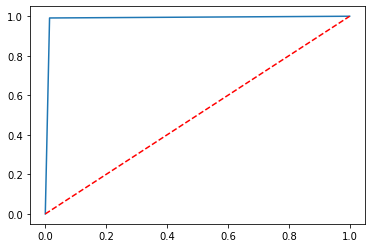

Auc:  0.9881854505373382


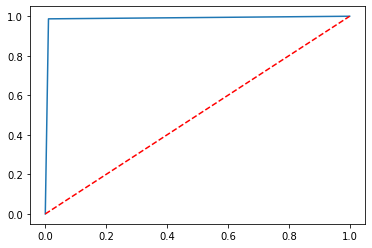

In [9]:
auc = roc_auc_score(y_train, lr.predict(x_train),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_train, lr.predict(x_train))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()
auc = roc_auc_score(y_test, lr.predict(x_test),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict(x_test))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()

In [10]:
adr = AdaBoostRegressor(random_state=42)
adr = adr.fit(x_train, y_train)

In [11]:
print(log_loss(y_test, adr.predict(x_test)))

0.1158844074079783


Auc:  1.0


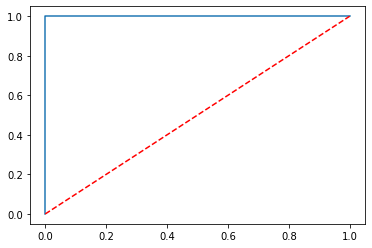

Auc:  1.0


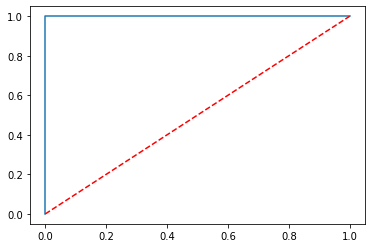

In [12]:
auc = roc_auc_score(y_train, adr.predict(x_train),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_train, adr.predict(x_train))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()
auc = roc_auc_score(y_test, adr.predict(x_test),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_test, adr.predict(x_test))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()

In [13]:
def BinaryCrossEntropy(y_test, y_pred_model):
    term_0 = (1-y_test) * np.log(1-y_pred_model + 1e-7)
    term_1 = y_test * np.log(y_pred_model + 1e-7)
    return -np.mean(term_0+term_1, axis=0)
bce = lr

In [14]:
print(BinaryCrossEntropy(y_test, bce.predict(x_test)))

0.18796603120651598


Auc:  0.9886279338324703


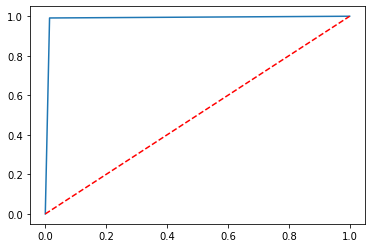

Auc:  0.9881854505373382


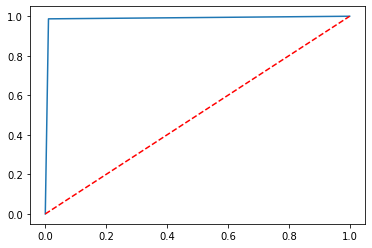

In [15]:
auc = roc_auc_score(y_train, bce.predict(x_train),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_train, bce.predict(x_train))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()
auc = roc_auc_score(y_test, bce.predict(x_test),  multi_class='ovr')
print('Auc: ', auc)
fpr, tpr, thresholds = roc_curve(y_test, bce.predict(x_test))
pylab.plot(fpr, tpr)
pylab.plot([0, 1], [0, 1], 'r--')
pylab.show()